In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/insuranceFINAL.csv'
data = pd.read_csv(file_path)

# Display the first 5 rows before any preprocessing
print("First 5 rows before any preprocessing:")
print(data.head())


First 5 rows before any preprocessing:
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['sex', 'smoker', 'region']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Display the first 5 rows after encoding
print("First 5 rows after encoding:")
print(data.head())


First 5 rows after encoding:
   age  sex   bmi  children  smoker  region  expenses
0   19    0  27.9         0       1       3  16884.92
1   18    1  33.8         1       0       2   1725.55
2   28    1  33.0         3       0       2   4449.46
3   33    1  22.7         0       0       1  21984.47
4   32    1  28.9         0       0       1   3866.86


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize/scale numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'bmi', 'children', 'expenses']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first 5 rows after normalization
print("First 5 rows after normalization:")
print(data.head())




First 5 rows after normalization:
        age  sex       bmi  children  smoker  region  expenses
0 -1.438764    0 -0.453646 -0.908614       1       3  0.298583
1 -1.509965    1  0.514186 -0.078767       0       2 -0.953689
2 -0.797954    1  0.382954  1.580926       0       2 -0.728675
3 -0.441948    1 -1.306650 -0.908614       0       1  0.719843
4 -0.513149    1 -0.289606 -0.908614       0       1 -0.776802


In [ ]:
# Summary statistics of the dataset
summary_stats = data.describe()
print("Summary statistics:")
print(summary_stats)


Summary statistics:
                age          sex           bmi      children       smoker  \
count  1.338000e+03  1338.000000  1.338000e+03  1.338000e+03  1338.000000   
mean  -1.805565e-16     0.505232 -4.089073e-16 -5.576008e-17     0.204783   
std    1.000374e+00     0.500160  1.000374e+00  1.000374e+00     0.403694   
min   -1.509965e+00     0.000000 -2.405713e+00 -9.086137e-01     0.000000   
25%   -8.691547e-01     0.000000 -7.161085e-01 -9.086137e-01     0.000000   
50%   -1.474046e-02     1.000000 -4.354763e-02 -7.876719e-02     0.000000   
75%    8.396738e-01     1.000000  6.618210e-01  7.510793e-01     0.000000   
max    1.765289e+00     1.000000  3.680143e+00  3.240619e+00     1.000000   

            region      expenses  
count  1338.000000  1.338000e+03  
mean      1.515695 -8.762298e-17  
std       1.104885  1.000374e+00  
min       0.000000 -1.003558e+00  
25%       1.000000 -7.046504e-01  
50%       2.000000 -3.212091e-01  
75%       2.000000  2.783443e-01  
max   

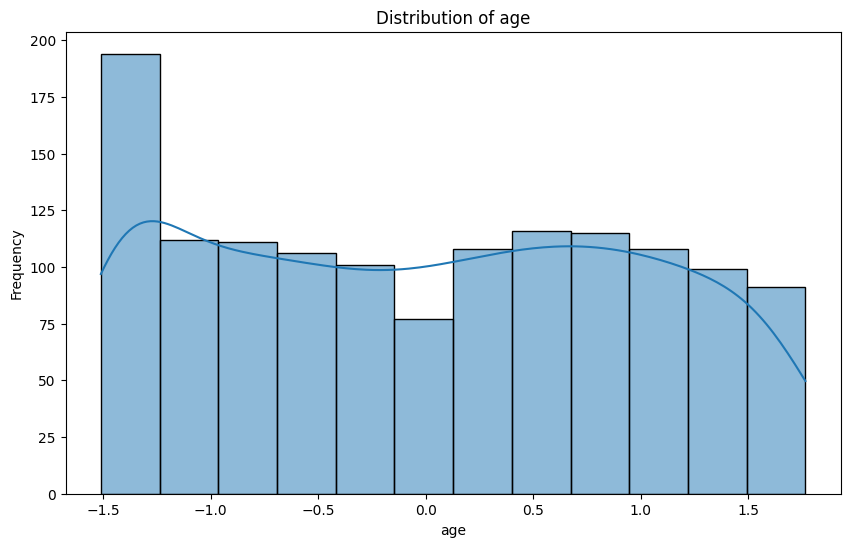

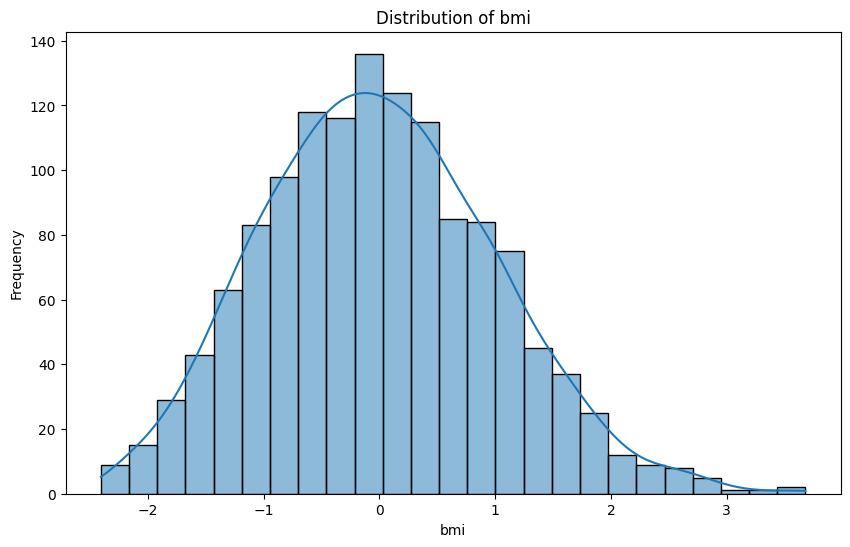

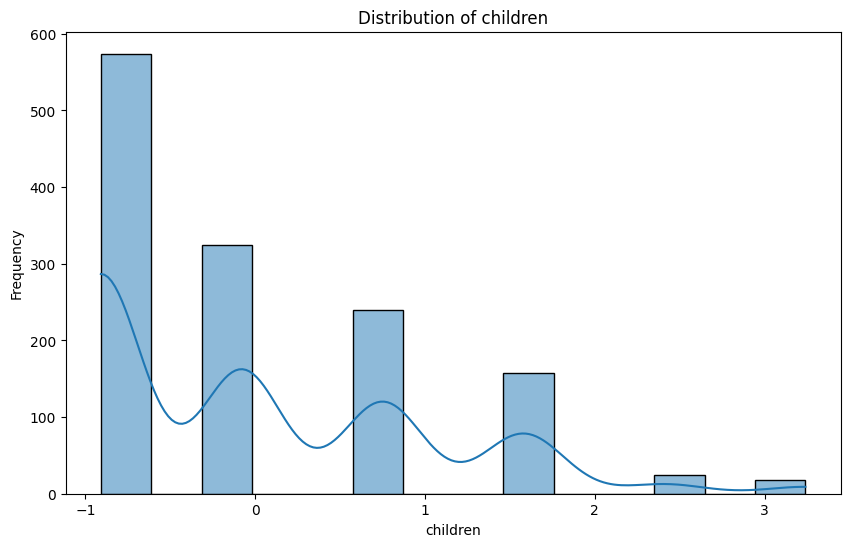

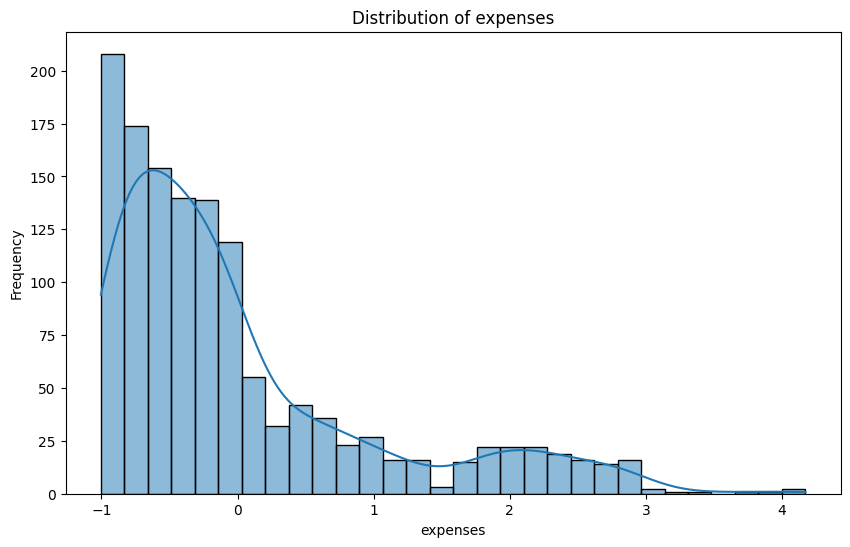

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical features
numerical_columns = ['age', 'bmi', 'children', 'expenses']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Correlation matrix:
               age       sex       bmi  children    smoker    region  expenses
age       1.000000 -0.020856  0.109341  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046380  0.017163  0.076185  0.004588  0.057292
bmi       0.109341  0.046380  1.000000  0.012645  0.003968  0.157439  0.198576
children  0.042469  0.017163  0.012645  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003968  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157439  0.016569 -0.002181  1.000000 -0.006208
expenses  0.299008  0.057292  0.198576  0.067998  0.787251 -0.006208  1.000000


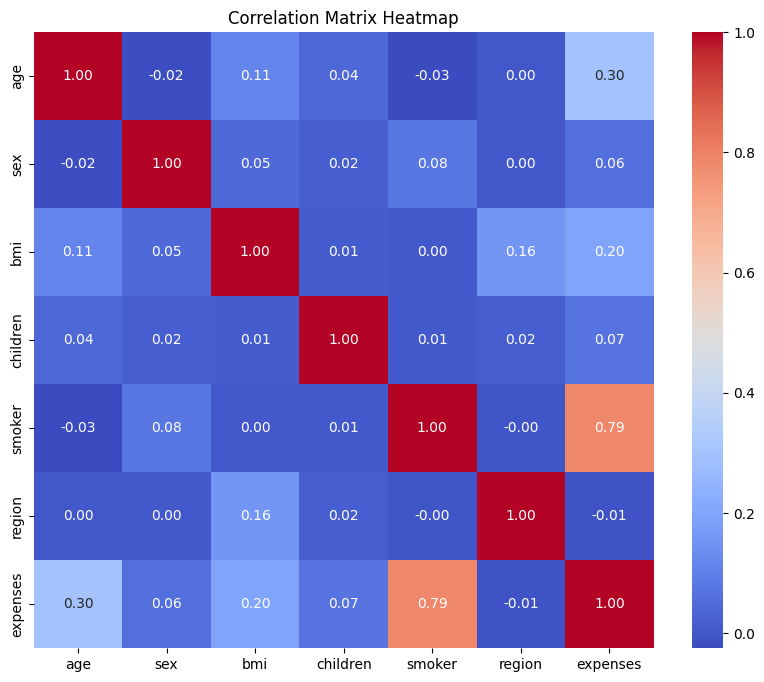

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()
print("Correlation matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


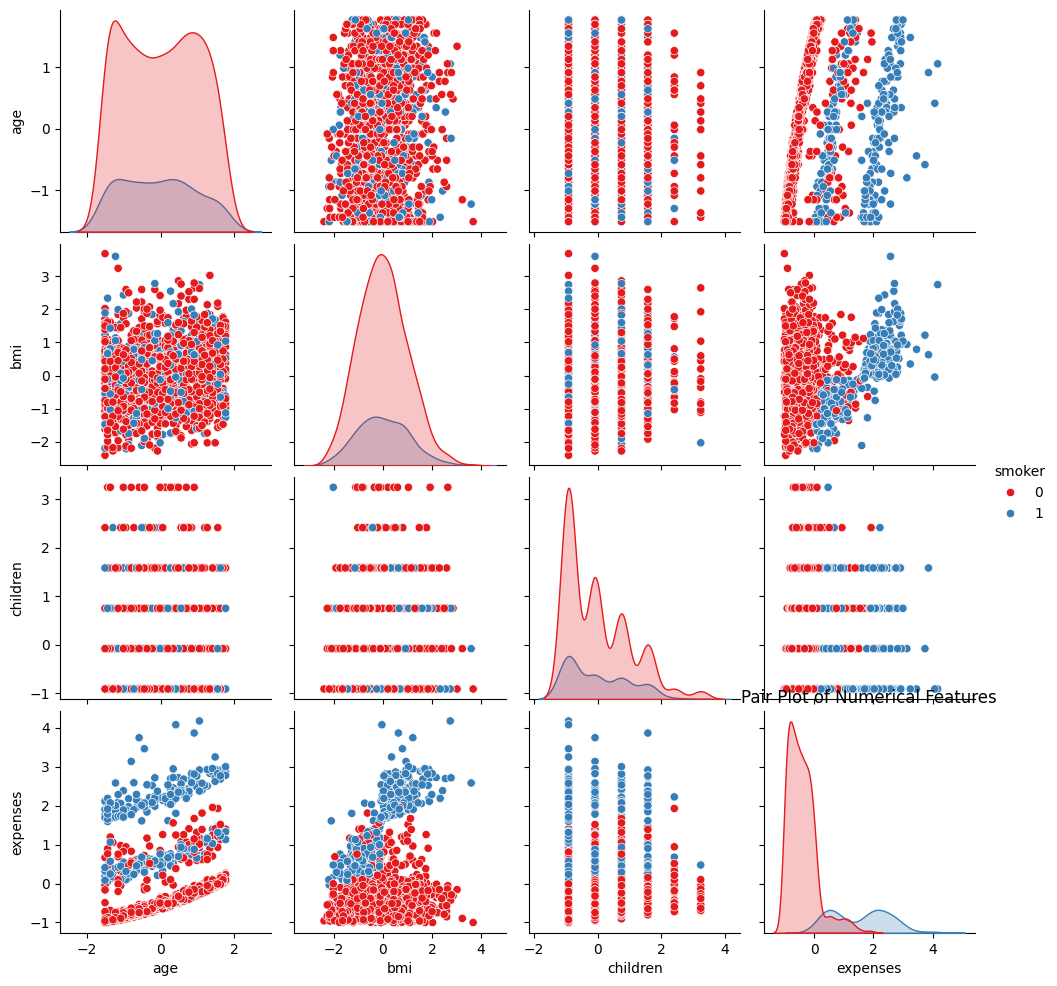

In [ ]:
# Pair plot of numerical features
sns.pairplot(data, vars=numerical_columns, hue='smoker', palette='Set1')
plt.title('Pair Plot of Numerical Features')
plt.show()


<ipython-input-15-2f2a68ed4ca8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y=col, data=data, palette='Set1')


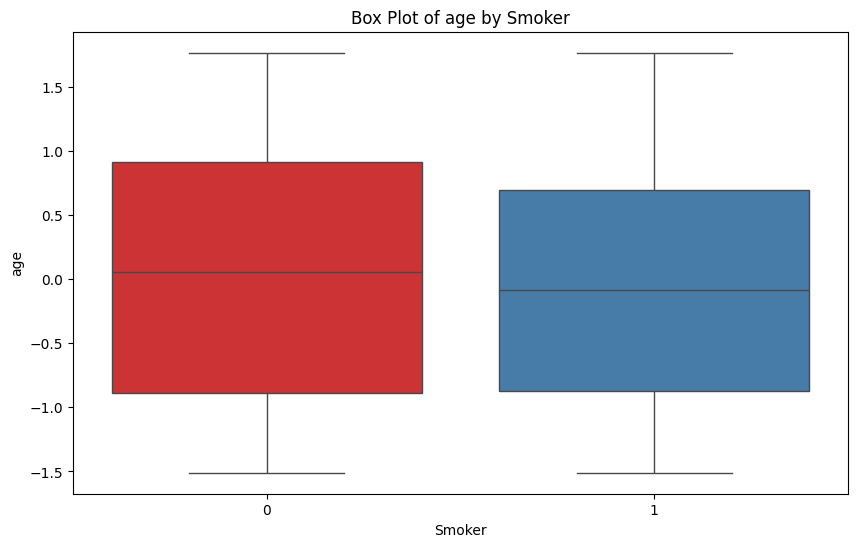

<ipython-input-15-2f2a68ed4ca8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y=col, data=data, palette='Set1')


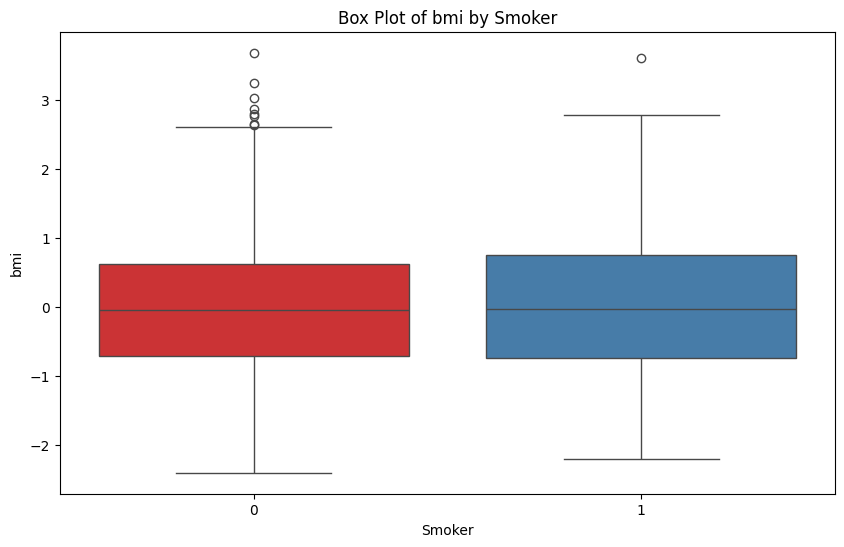

<ipython-input-15-2f2a68ed4ca8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y=col, data=data, palette='Set1')


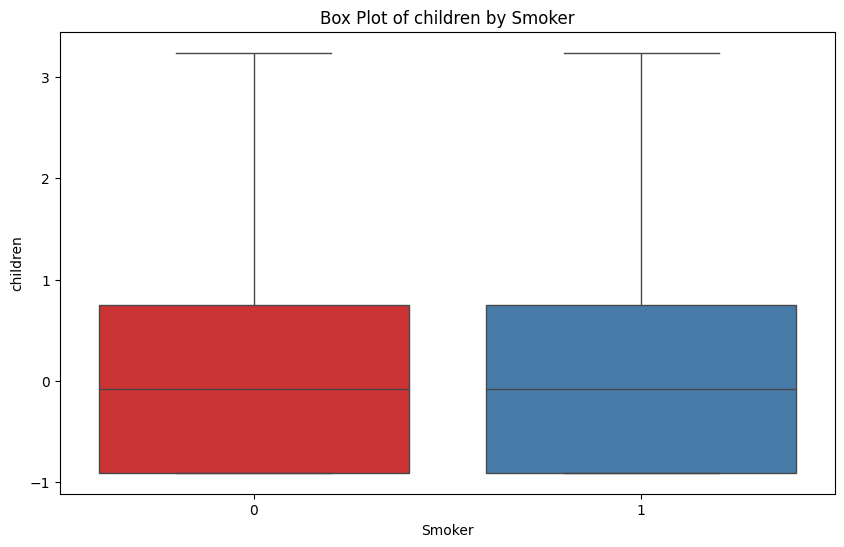

<ipython-input-15-2f2a68ed4ca8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y=col, data=data, palette='Set1')


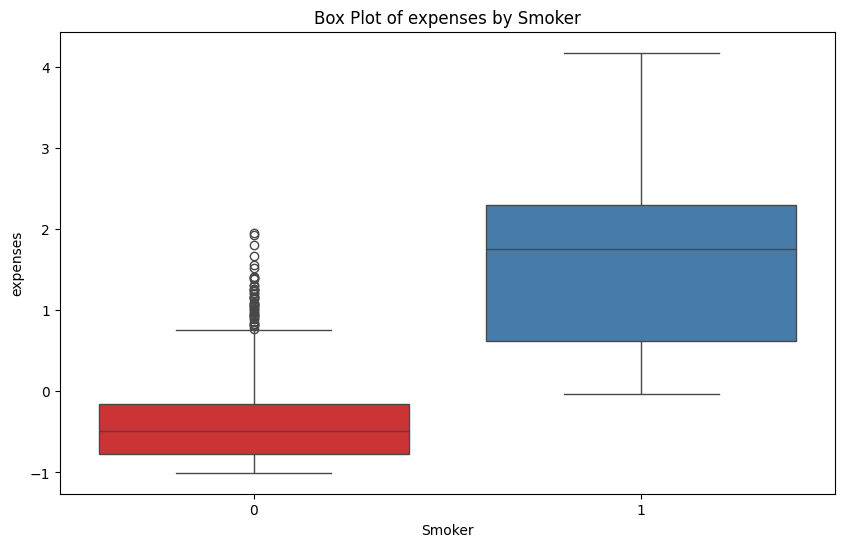

In [ ]:
# Box plots to visualize distribution and outliers in numerical features
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='smoker', y=col, data=data, palette='Set1')
    plt.title(f'Box Plot of {col} by Smoker')
    plt.xlabel('Smoker')
    plt.ylabel(col)
    plt.show()


<ipython-input-16-b6dc4eac8398>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


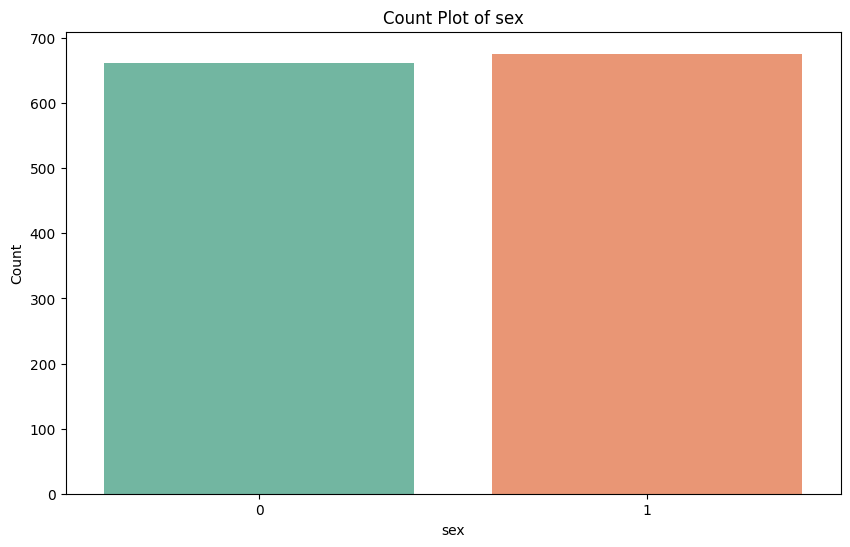

<ipython-input-16-b6dc4eac8398>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


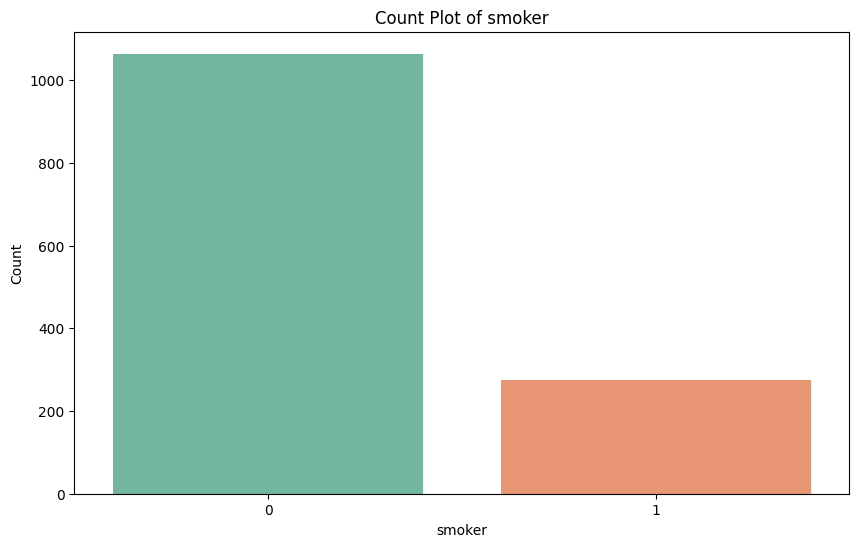

<ipython-input-16-b6dc4eac8398>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


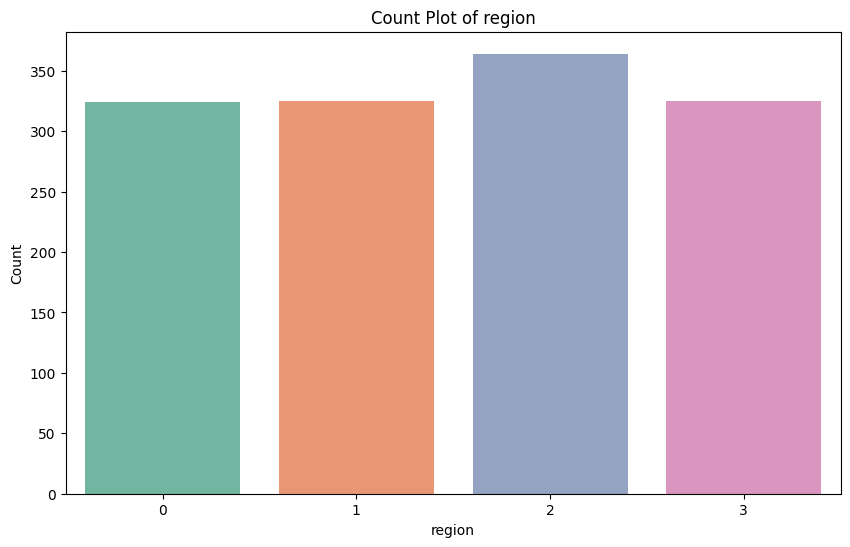

In [ ]:
# Count plots for categorical features
categorical_columns = ['sex', 'smoker', 'region']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


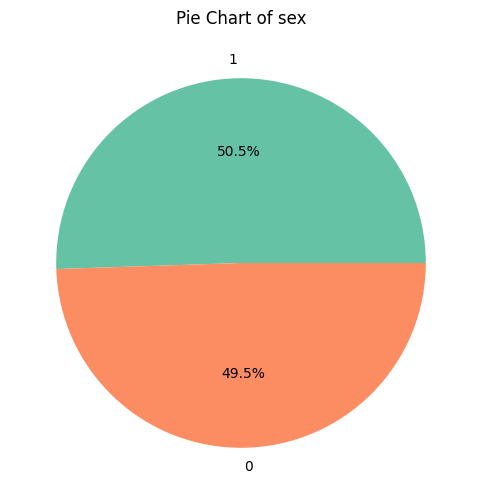

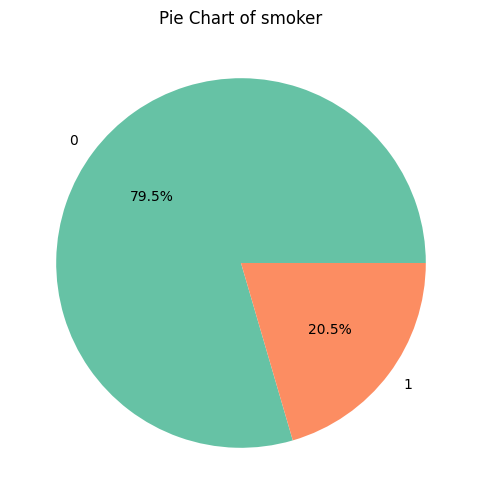

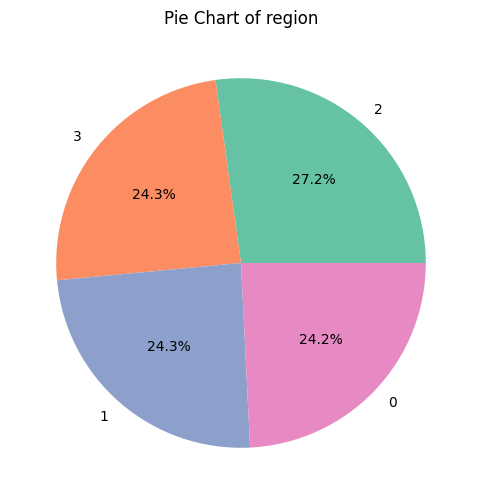

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame and 'categorical_columns' is already defined
categorical_columns = ['sex', 'smoker', 'region']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    data[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  # To remove the 'y' label from the pie chart
    plt.show()


Mutual Information Scores:
age         1.495488
smoker      0.369171
sex         0.176660
children    0.161357
bmi         0.081572
region      0.076675
dtype: float64


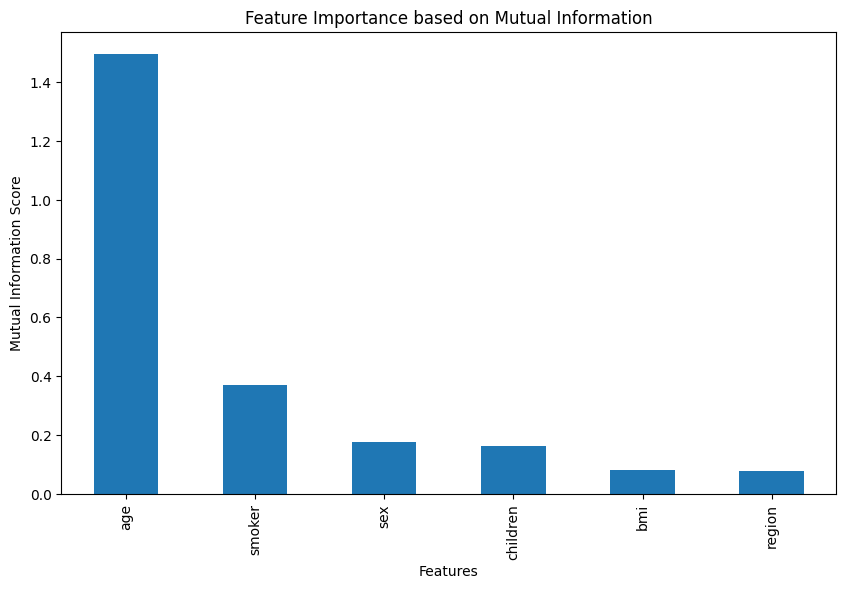

Top features based on mutual information: ['age', 'smoker', 'sex']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Use the processed data already in the environment
# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Compute mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series = mutual_info_series.sort_values(ascending=False)

print("Mutual Information Scores:")
print(mutual_info_series)

# Plot the ranking of features
plt.figure(figsize=(10, 6))
mutual_info_series.plot(kind='bar')
plt.title('Feature Importance based on Mutual Information')
plt.ylabel('Mutual Information Score')
plt.xlabel('Features')
plt.show()

# Select top features based on mutual information
top_features = mutual_info_series.head(3).index.tolist()
print("Top features based on mutual information:", top_features)


Selected Features using RFE:
['age', 'bmi', 'smoker']


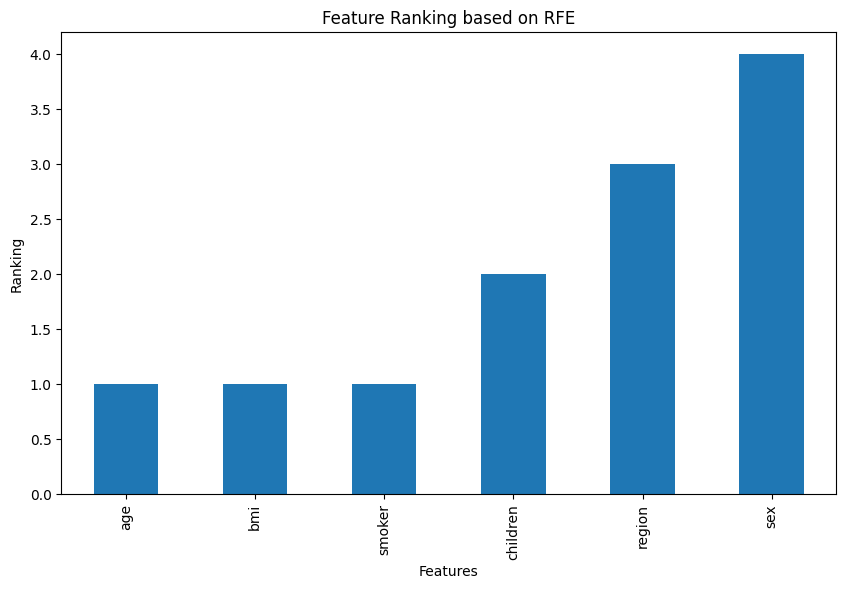

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Use the processed data already in the environment
# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Create a linear regression model
model = LinearRegression()

# Use Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Selected Features using RFE:")
selected_features_rfe = X.columns[fit.support_].tolist()
print(selected_features_rfe)

# Plot the ranking of features
ranking = fit.ranking_
ranking_series = pd.Series(ranking, index=X.columns).sort_values()
plt.figure(figsize=(10, 6))
ranking_series.plot(kind='bar')
plt.title('Feature Ranking based on RFE')
plt.ylabel('Ranking')
plt.xlabel('Features')
plt.show()


R2 Score: 0.7833214205203847
RMSE: 0.47911506859042646
MAE: 0.345871323100893


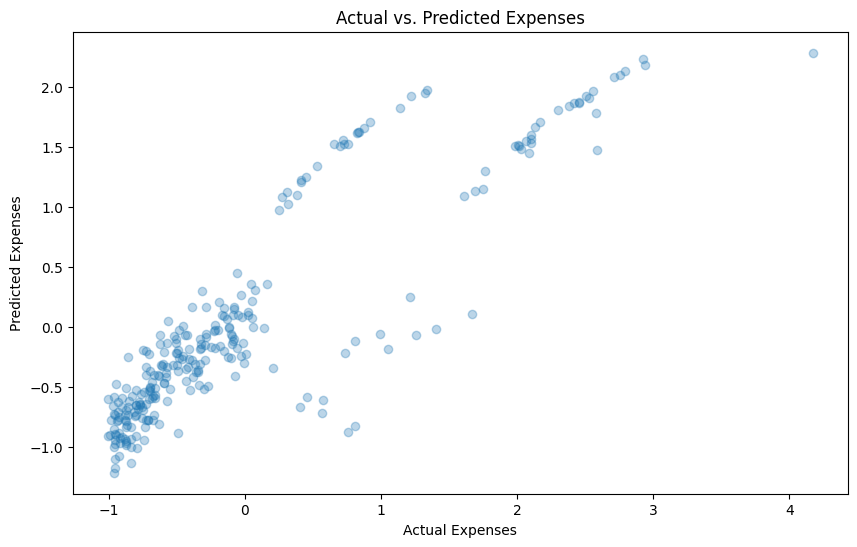

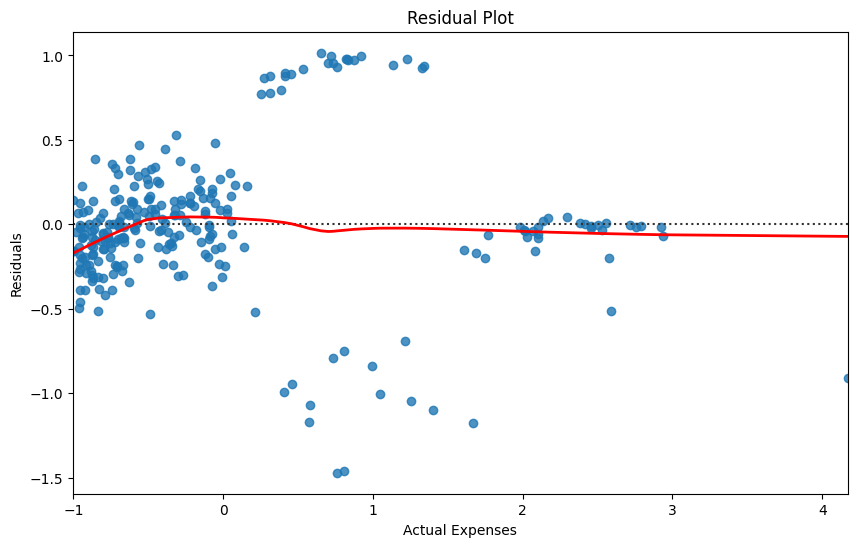

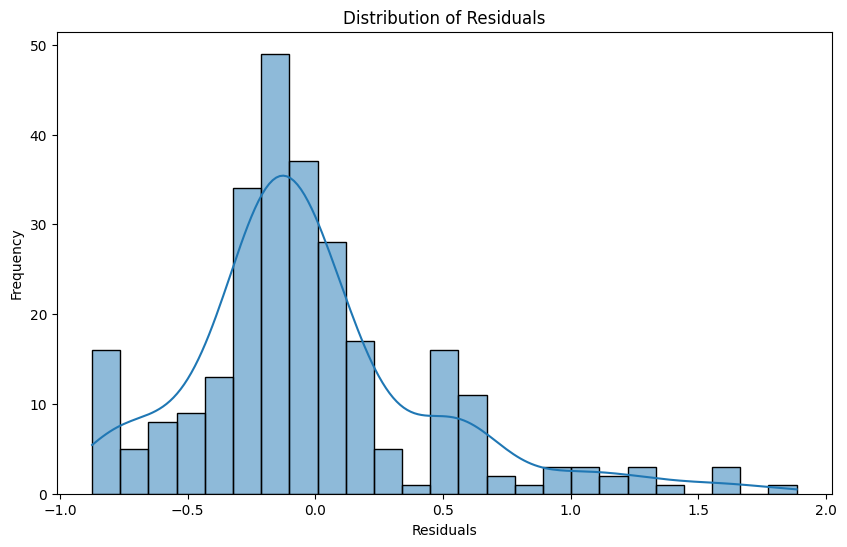

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the processed data is already in the environment and stored in the variable `data`
# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Plotting the results

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("Actual vs. Predicted Expenses")
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel("Actual Expenses")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


R2 Score: 0.7440092249119115
RMSE: 0.5207676496464011
MAE: 0.27221556196669583


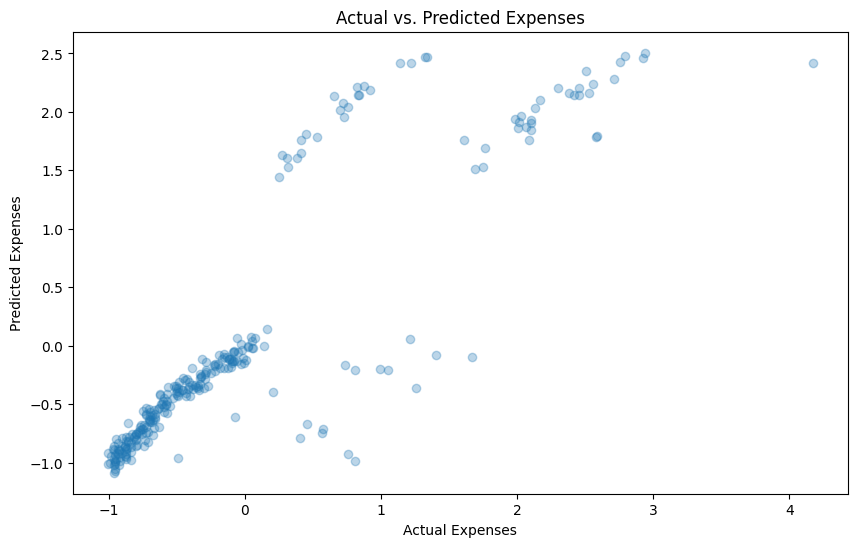

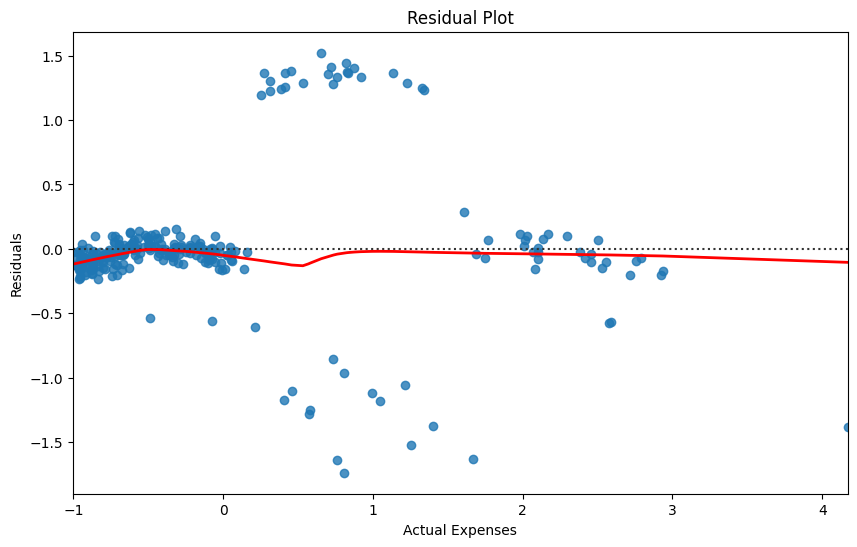

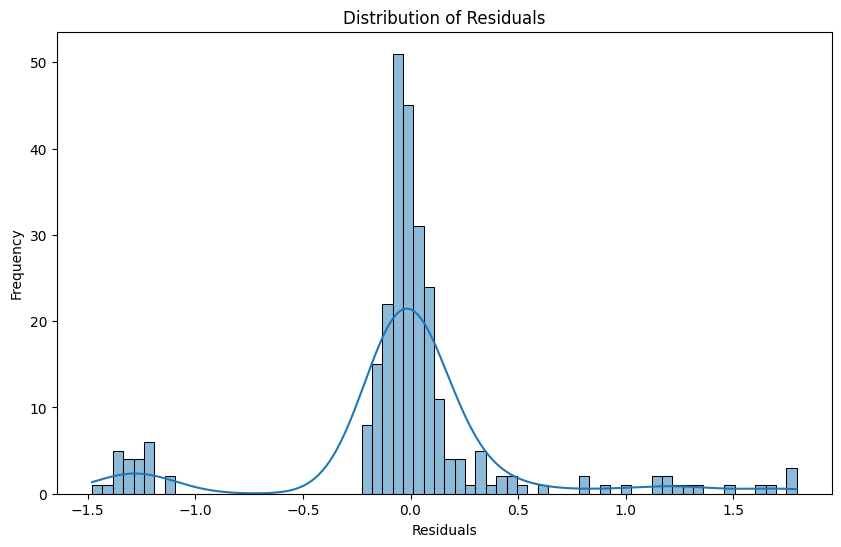

In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the processed data is already in the environment and stored in the variable `data`
# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the SVM regressor model
model = SVR(kernel='linear')  # You can experiment with different kernels such as 'rbf'
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Plotting the results

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("Actual vs. Predicted Expenses")
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel("Actual Expenses")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


R2 Score: 0.8631422714589767
RMSE: 0.38077331412884613
MAE: 0.20954634430063956


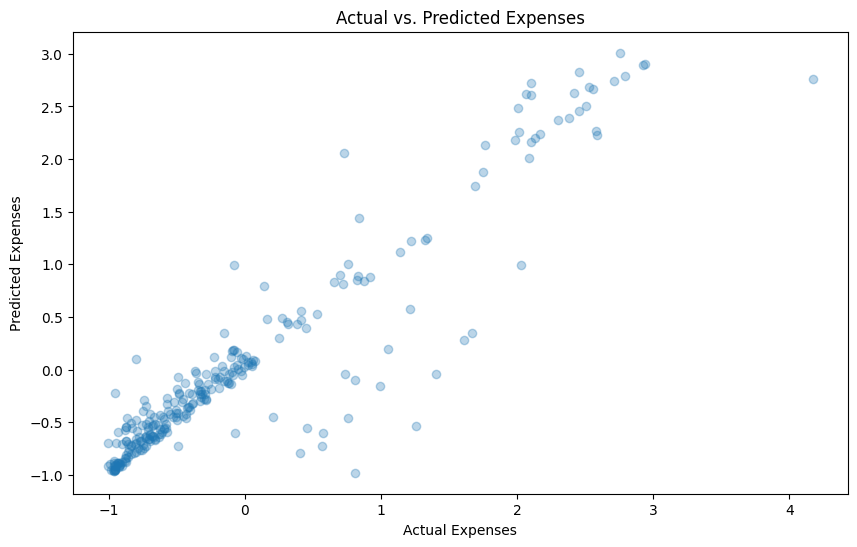

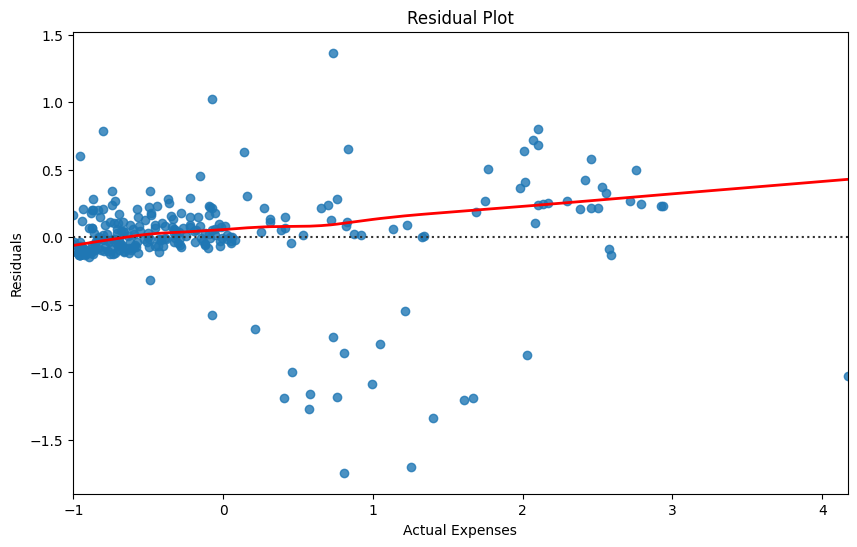

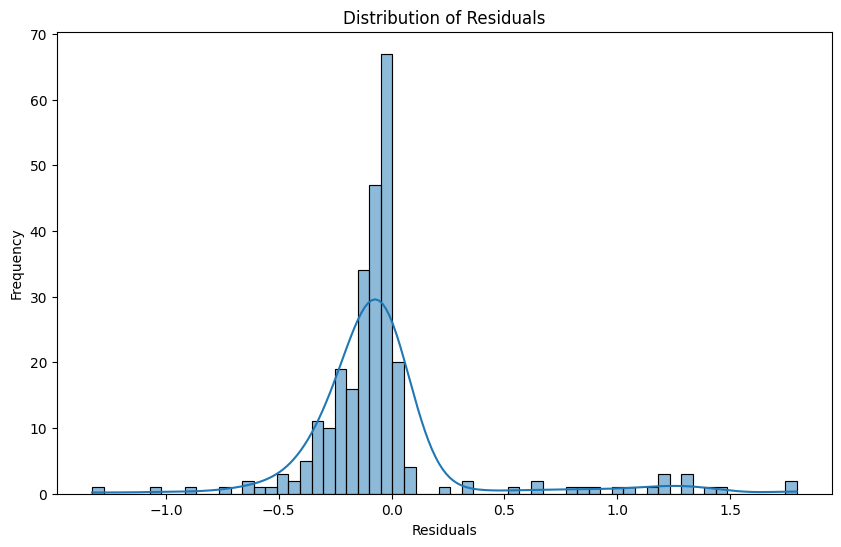

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the processed data is already in the environment and stored in the variable `data`
# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Plotting the results

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("Actual vs. Predicted Expenses")
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel("Actual Expenses")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [ ]:
pip install xgboost


R2 Score: 0.8394038340355628
RMSE: 0.4124767051500321
MAE: 0.23140220096120592


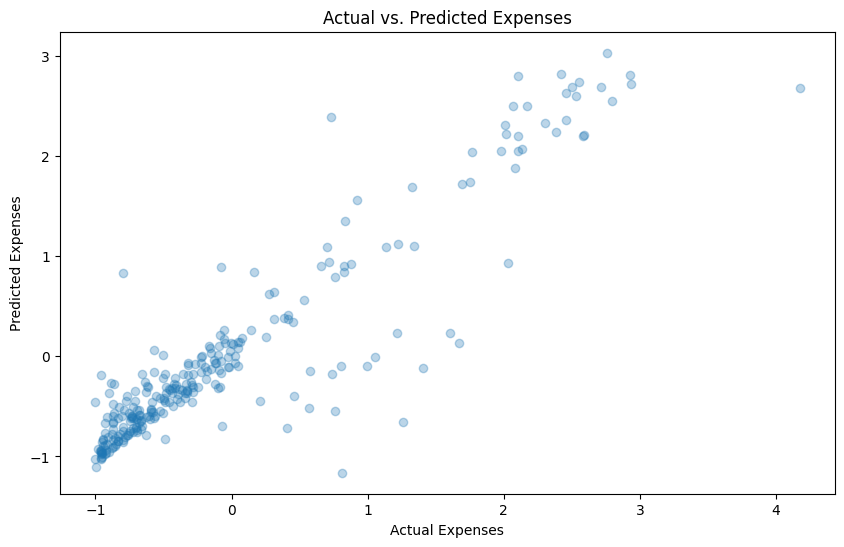

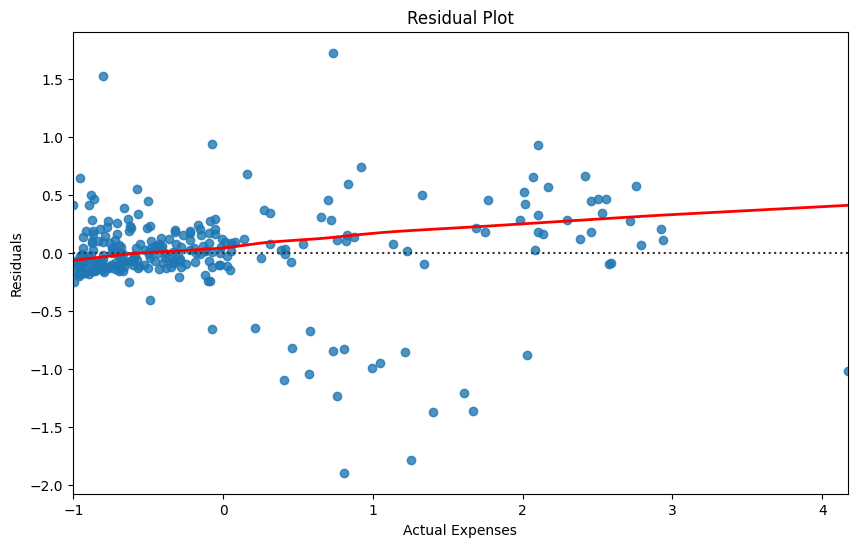

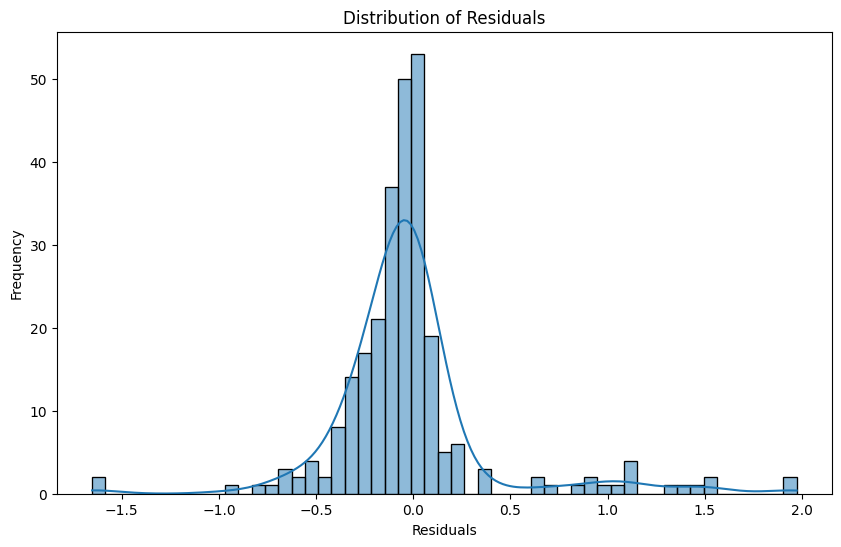

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the processed data is already in the environment and stored in the variable `data`
# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost regressor model
model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Plotting the results

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("Actual vs. Predicted Expenses")
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel("Actual Expenses")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [ ]:
pip install tensorflow


Epoch 1/100
27/27 [==============================] - 5s 30ms/step - loss: 0.6874 - val_loss: 0.4904
Epoch 2/100
27/27 [==============================] - 0s 13ms/step - loss: 0.3285 - val_loss: 0.2850
Epoch 3/100
27/27 [==============================] - 0s 14ms/step - loss: 0.2230 - val_loss: 0.2304
Epoch 4/100
27/27 [==============================] - 1s 19ms/step - loss: 0.1887 - val_loss: 0.1974
Epoch 5/100
27/27 [==============================] - 0s 11ms/step - loss: 0.1743 - val_loss: 0.1799
Epoch 6/100
27/27 [==============================] - 0s 8ms/step - loss: 0.1658 - val_loss: 0.1698
Epoch 7/100
27/27 [==============================] - 0s 15ms/step - loss: 0.1607 - val_loss: 0.1638
Epoch 8/100
27/27 [==============================] - 0s 14ms/step - loss: 0.1545 - val_loss: 0.1599
Epoch 9/100
27/27 [==============================] - 0s 17ms/step - loss: 0.1519 - val_loss: 0.1574
Epoch 10/100
27/27 [==============================] - 0s 13ms/step - loss: 0.1487 - val_loss: 0.1511


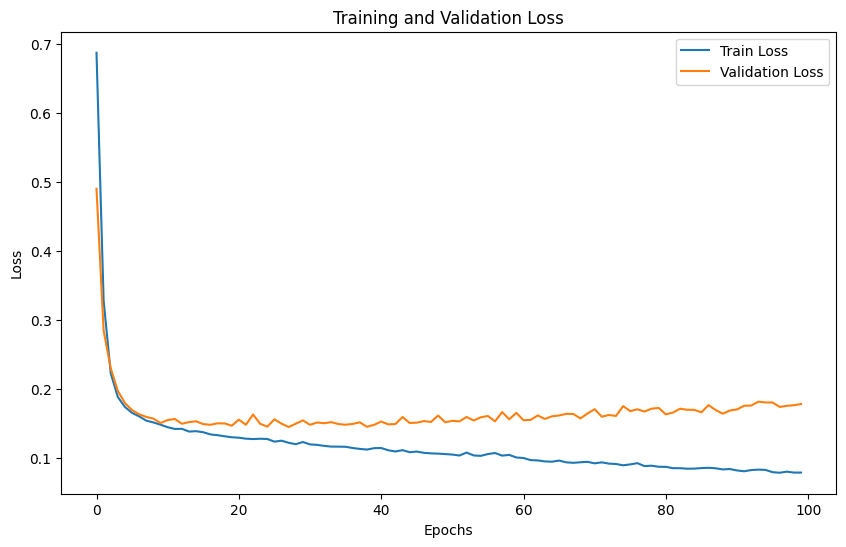

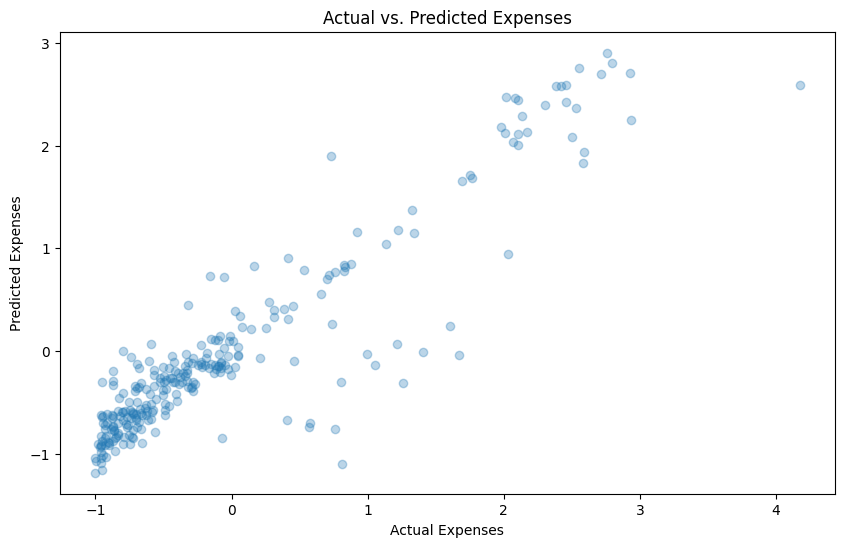

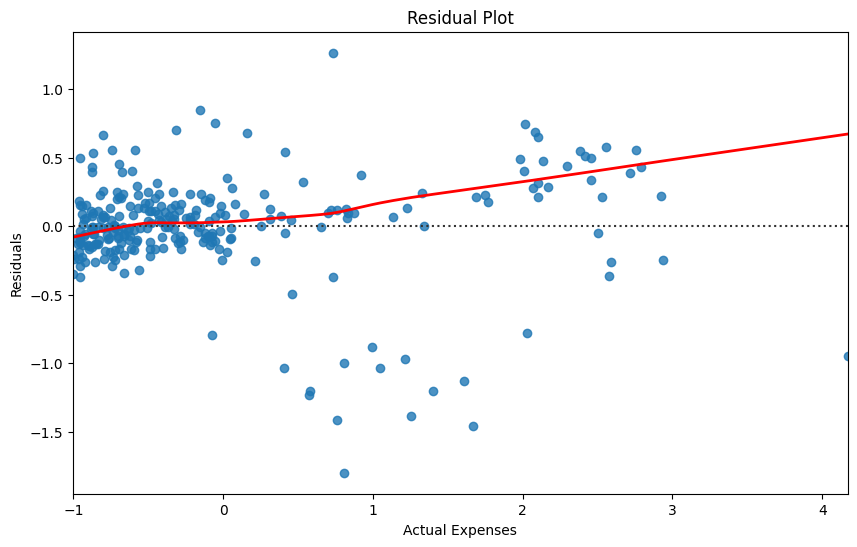

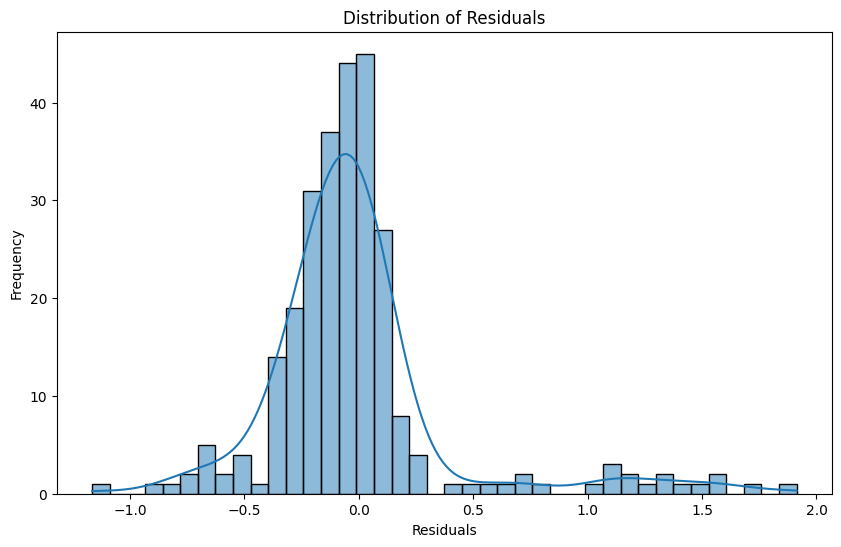

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the processed data is already in the environment and stored in the variable `data`
# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Deep Feedforward Neural Network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

# Predict the target values for the test set
y_pred = model.predict(X_test).flatten()

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Plotting the results

# Loss plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("Actual vs. Predicted Expenses")
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel("Actual Expenses")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


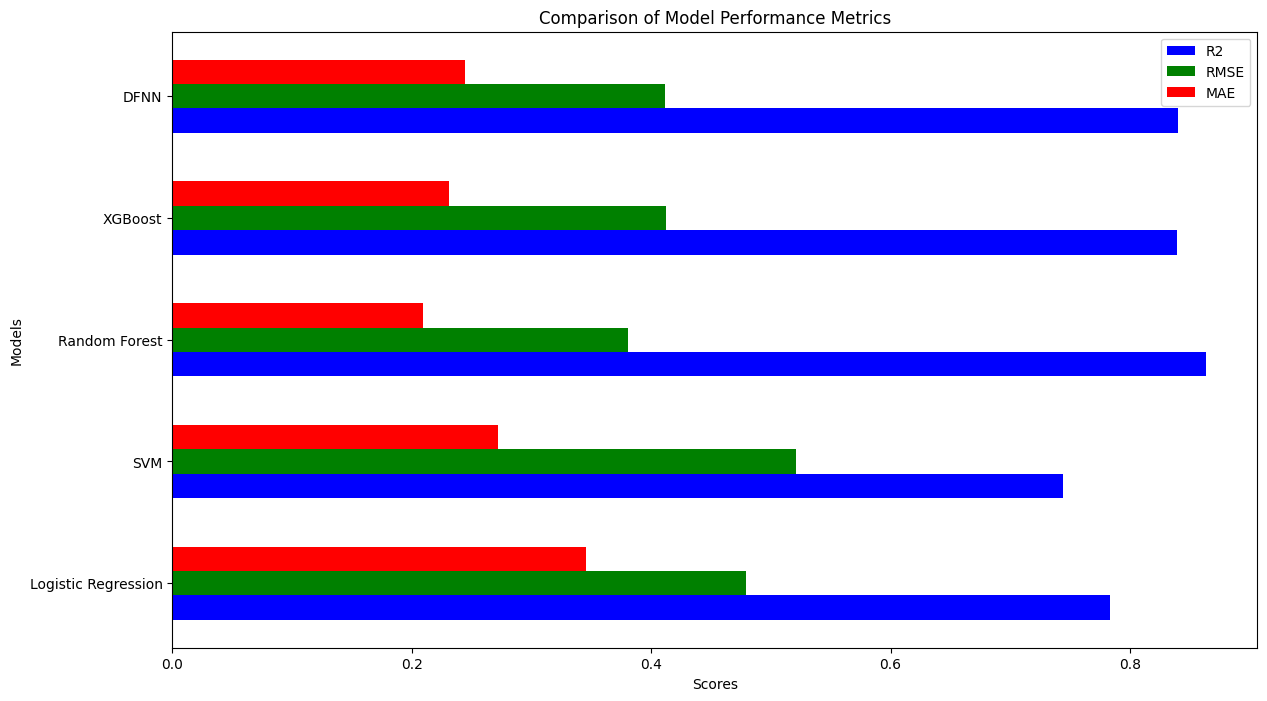

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for each model
models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 'DFNN']
r2_scores = [0.7833, 0.7440, 0.8631, 0.8394, 0.8404]
rmse_scores = [0.4791, 0.5208, 0.3808, 0.4125, 0.4112]
mae_scores = [0.3459, 0.2722, 0.2095, 0.2314, 0.2447]

# Set the bar width
bar_width = 0.2

# Set positions for the bars on the x-axis
r2_positions = np.arange(len(models))
rmse_positions = [x + bar_width for x in r2_positions]
mae_positions = [x + bar_width for x in rmse_positions]

# Plot the bars
plt.figure(figsize=(14, 8))
plt.barh(r2_positions, r2_scores, color='b', height=bar_width, label='R2')
plt.barh(rmse_positions, rmse_scores, color='g', height=bar_width, label='RMSE')
plt.barh(mae_positions, mae_scores, color='r', height=bar_width, label='MAE')

# Add labels and title
plt.xlabel('Scores')
plt.ylabel('Models')
plt.title('Comparison of Model Performance Metrics')
plt.yticks([r + bar_width for r in range(len(models))], models)

# Add legend
plt.legend()

# Show plot
plt.show()


R2 Score: 0.7825045695342142
MSE: 0.23041662828108456
MAE: 0.348390938961424


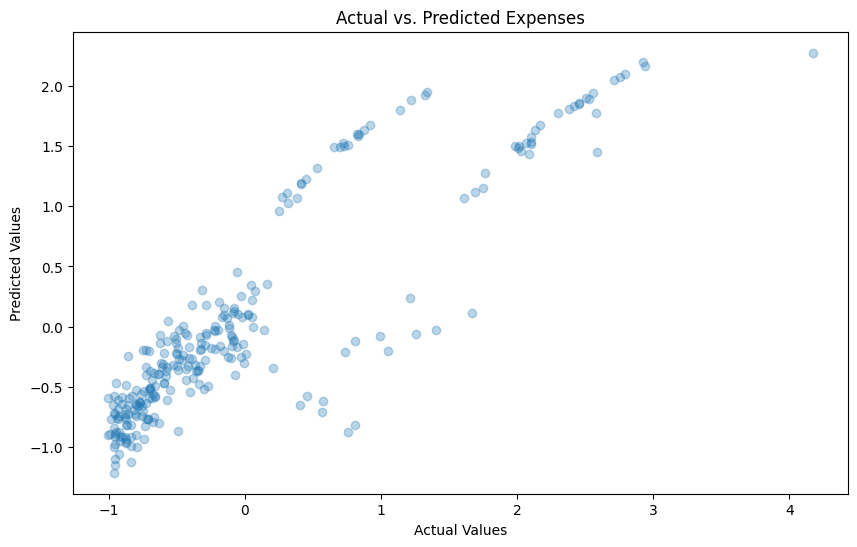

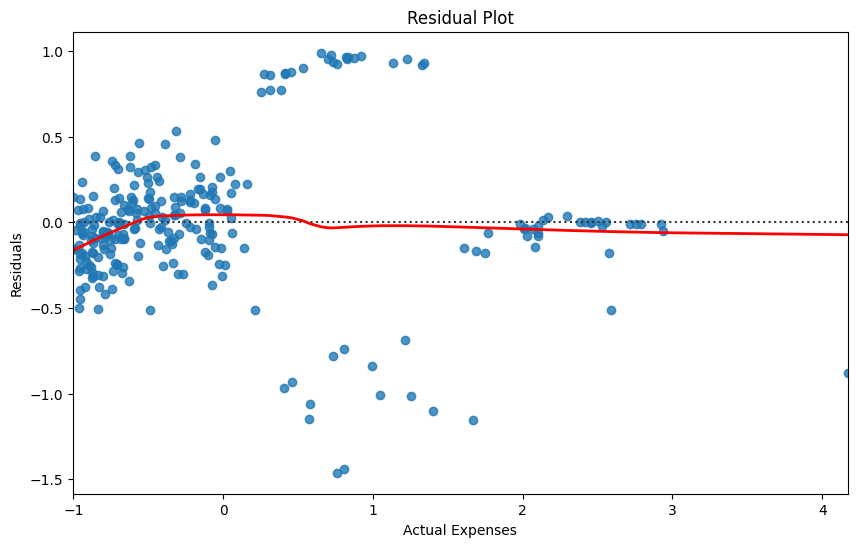

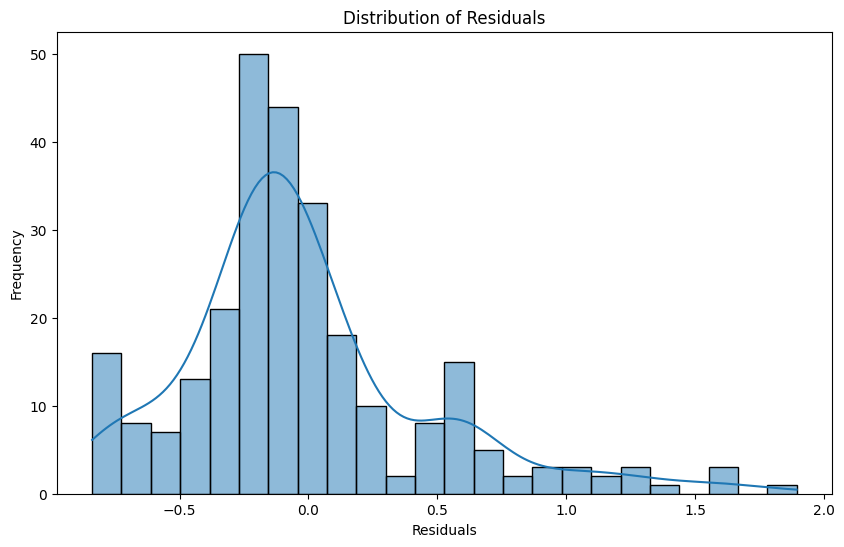

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the processed data is already in the environment and stored in the variable 'data'
# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the SGD regressor model with early stopping
model = SGDRegressor(max_iter=1000, tol=1e-3, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10, random_state=42)
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

# Plotting the results

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Expenses')
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Actual Expenses')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


R2 Score: 0.7703817157671036
MSE: 0.2432596893246209
MAE: 0.28623465667973486


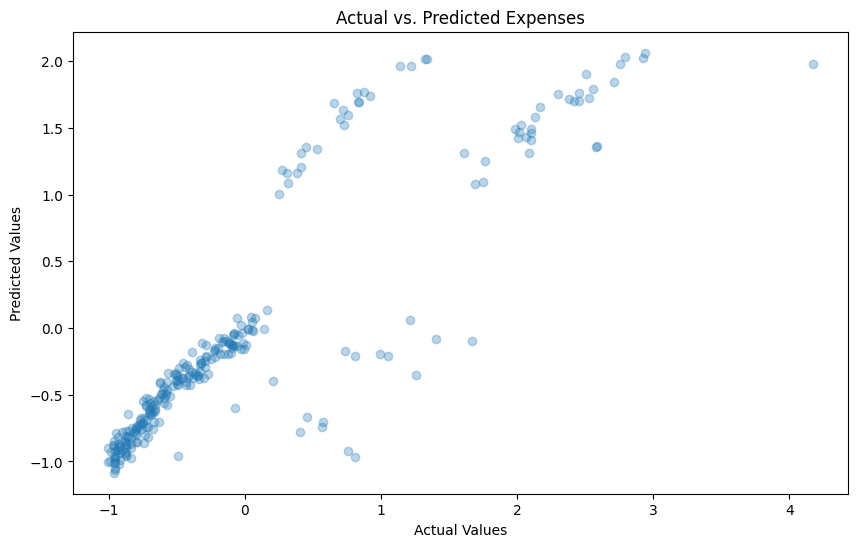

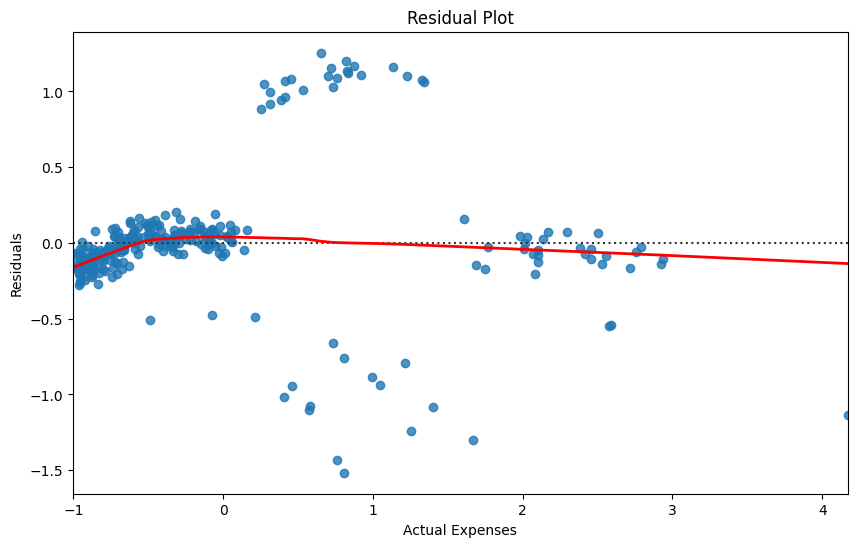

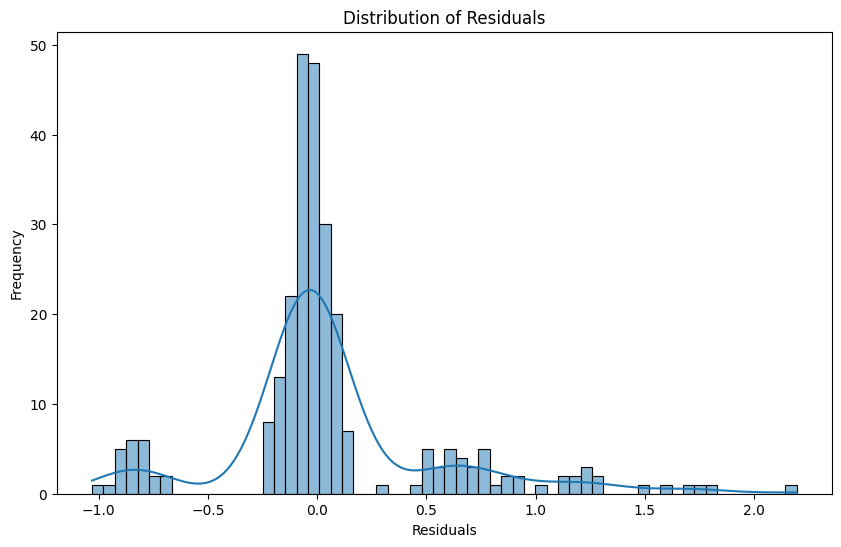

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the processed data is already in the environment and stored in the variable 'data'
# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the SGD regressor model with SVM loss and early stopping
model = SGDRegressor(loss='epsilon_insensitive', max_iter=1000, tol=1e-3, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10, random_state=42)
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

# Plotting the results

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Expenses')
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Actual Expenses')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


Number of trees: 10, Validation R2 Score: 0.8386805504367697
Number of trees: 50, Validation R2 Score: 0.8563462524978477
Number of trees: 100, Validation R2 Score: 0.8553050472867747
Number of trees: 200, Validation R2 Score: 0.8544329056285311
Number of trees: 500, Validation R2 Score: 0.8558569492071029
Best number of trees: 50
R2 Score: 0.8464694120377527
MSE: 0.15888049770147064
MAE: 0.22046157097751443


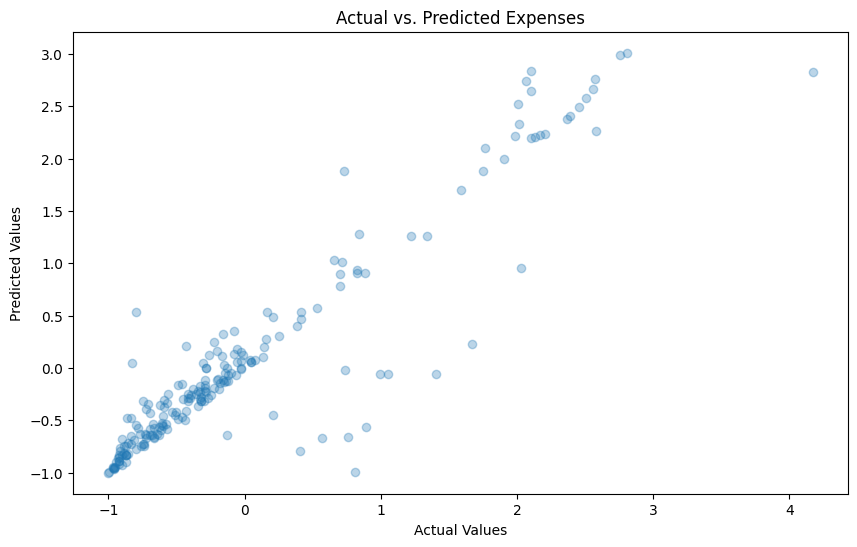

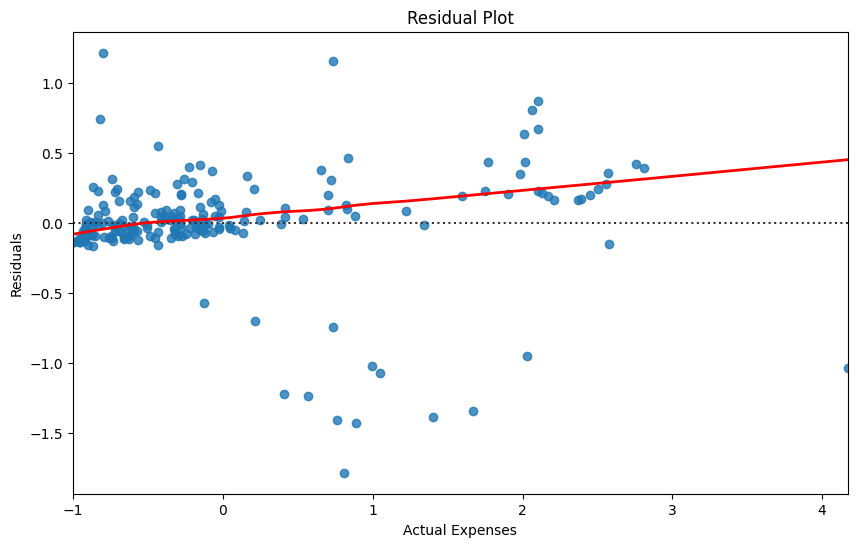

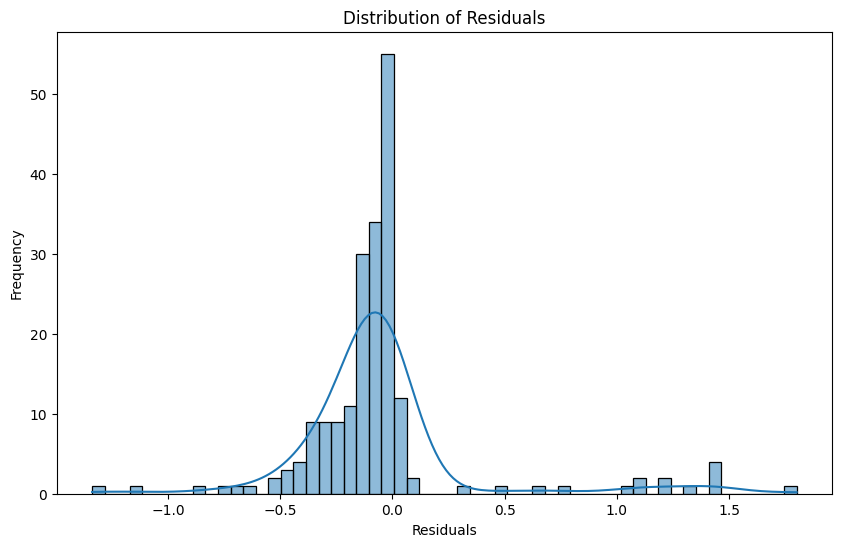

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the processed data is already in the environment and stored in the variable 'data'
# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Early stopping parameters
n_estimators_options = [10, 50, 100, 200, 500]
best_n_estimators = 0
best_val_score = -float('inf')

# Train models with increasing number of trees
for n_estimators in n_estimators_options:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate on validation set
    y_val_pred = model.predict(X_val)
    val_score = r2_score(y_val, y_val_pred)

    print(f"Number of trees: {n_estimators}, Validation R2 Score: {val_score}")

    if val_score > best_val_score:
        best_val_score = val_score
        best_n_estimators = n_estimators

# Train the best model on the full training data
best_model = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
best_model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best number of trees: {best_n_estimators}")
print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

# Plotting the results

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Expenses')
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Actual Expenses')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


[0]	train-rmse:0.74548	eval-rmse:0.73052
[1]	train-rmse:0.57768	eval-rmse:0.56866
[2]	train-rmse:0.46875	eval-rmse:0.46645
[3]	train-rmse:0.39914	eval-rmse:0.41131
[4]	train-rmse:0.35680	eval-rmse:0.37920
[5]	train-rmse:0.32970	eval-rmse:0.36425
[6]	train-rmse:0.30901	eval-rmse:0.35203
[7]	train-rmse:0.29293	eval-rmse:0.35009
[8]	train-rmse:0.28117	eval-rmse:0.35122
[9]	train-rmse:0.27083	eval-rmse:0.35269
[10]	train-rmse:0.26152	eval-rmse:0.35265
[11]	train-rmse:0.25384	eval-rmse:0.35180
[12]	train-rmse:0.24794	eval-rmse:0.35402
[13]	train-rmse:0.24404	eval-rmse:0.35451
[14]	train-rmse:0.24159	eval-rmse:0.35585
[15]	train-rmse:0.23652	eval-rmse:0.35982
[16]	train-rmse:0.23506	eval-rmse:0.35979
[17]	train-rmse:0.23271	eval-rmse:0.36077
R2 Score: 0.8613762220438869
MSE: 0.14345424665696713
MAE: 0.20149127693673352


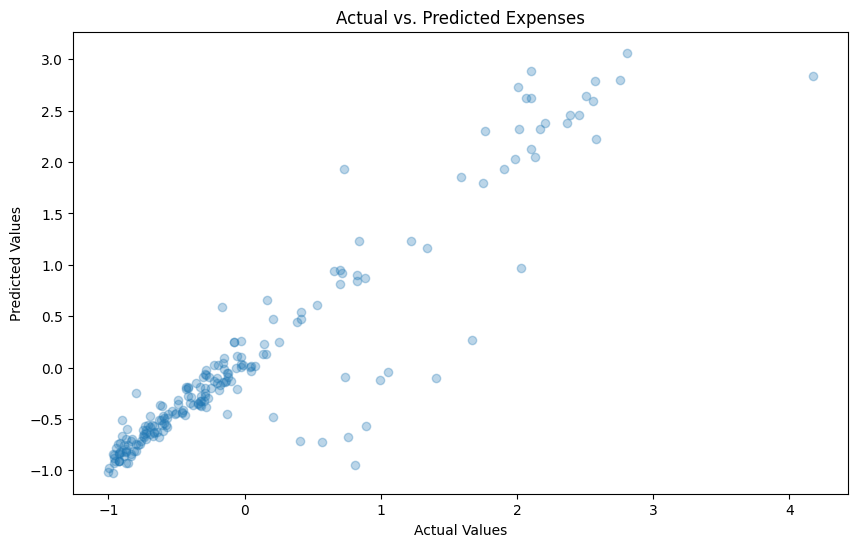

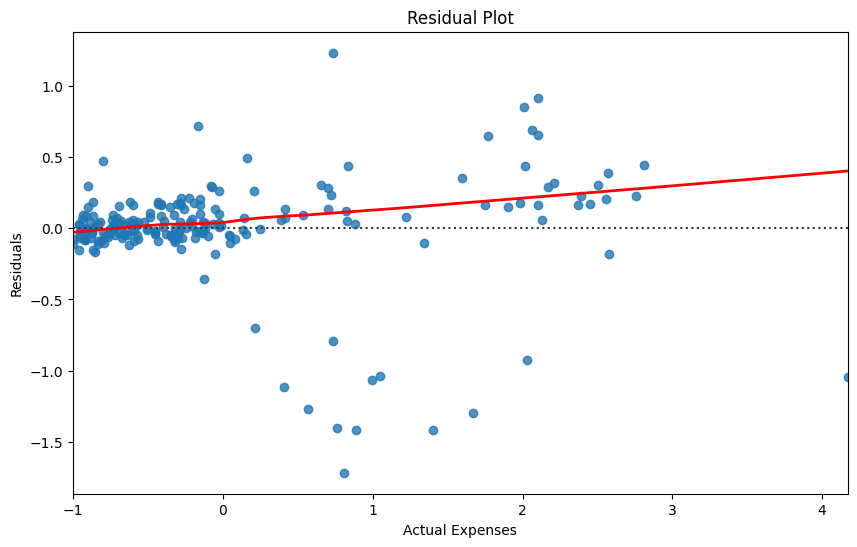

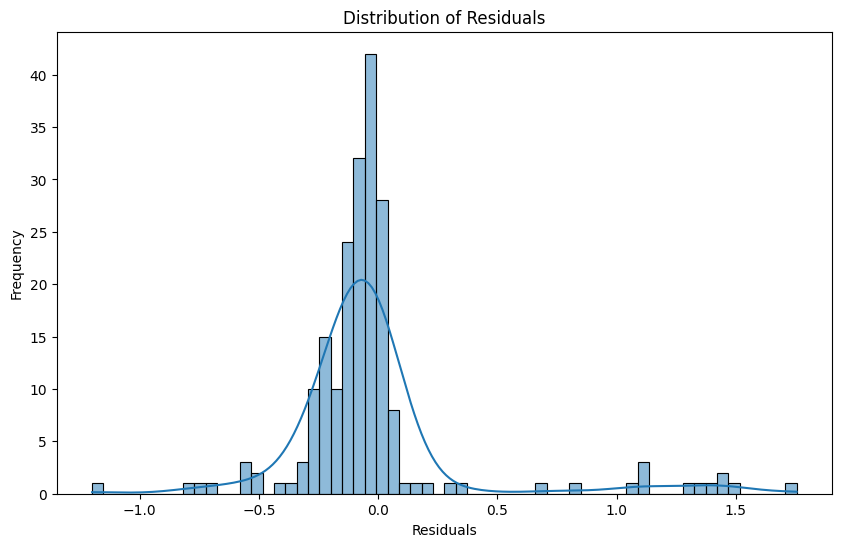

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the processed data is already in the environment and stored in the variable 'data'
# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Split the dataset into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert the datasets into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'random_state': 42
}

# Create an evaluation set
eval_set = [(dtrain, 'train'), (dval, 'eval')]

# Train the model with early stopping
model = xgb.train(params, dtrain, num_boost_round=1000, evals=eval_set, early_stopping_rounds=10, verbose_eval=True)

# Predict the target values for the test set
y_pred = model.predict(dtest)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

# Plotting the results

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Expenses')
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Actual Expenses')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


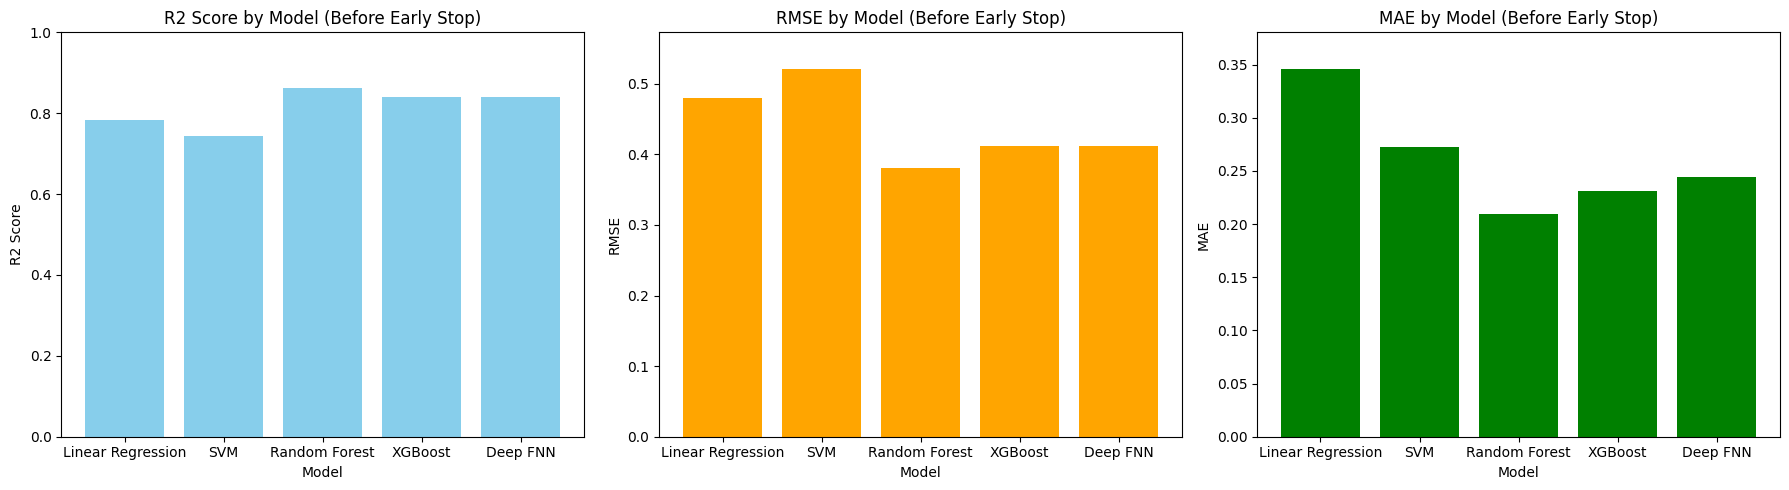

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the provided image
data = {
    'Model': ['Linear Regression', 'SVM', 'Random Forest', 'XGBoost', 'Deep FNN'],
    'R2 Score': [0.783321421, 0.744809225, 0.863142271, 0.839408384, 0.840832385],
    'RMSE': [0.479115609, 0.52076765, 0.380773141, 0.412476705, 0.411218126],
    'MAE': [0.345871231, 0.272215562, 0.209546344, 0.231402209, 0.244685594]
}

df = pd.DataFrame(data)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R2 Score
axes[0].bar(df['Model'], df['R2 Score'], color='skyblue')
axes[0].set_title('R2 Score by Model (Before Early Stop)')
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('R2 Score')

# RMSE
axes[1].bar(df['Model'], df['RMSE'], color='orange')
axes[1].set_title('RMSE by Model (Before Early Stop)')
axes[1].set_ylim(0, max(df['RMSE']) * 1.1)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('RMSE')

# MAE
axes[2].bar(df['Model'], df['MAE'], color='green')
axes[2].set_title('MAE by Model (Before Early Stop)')
axes[2].set_ylim(0, max(df['MAE']) * 1.1)
axes[2].set_xlabel('Model')
axes[2].set_ylabel('MAE')

plt.tight_layout()
plt.show()


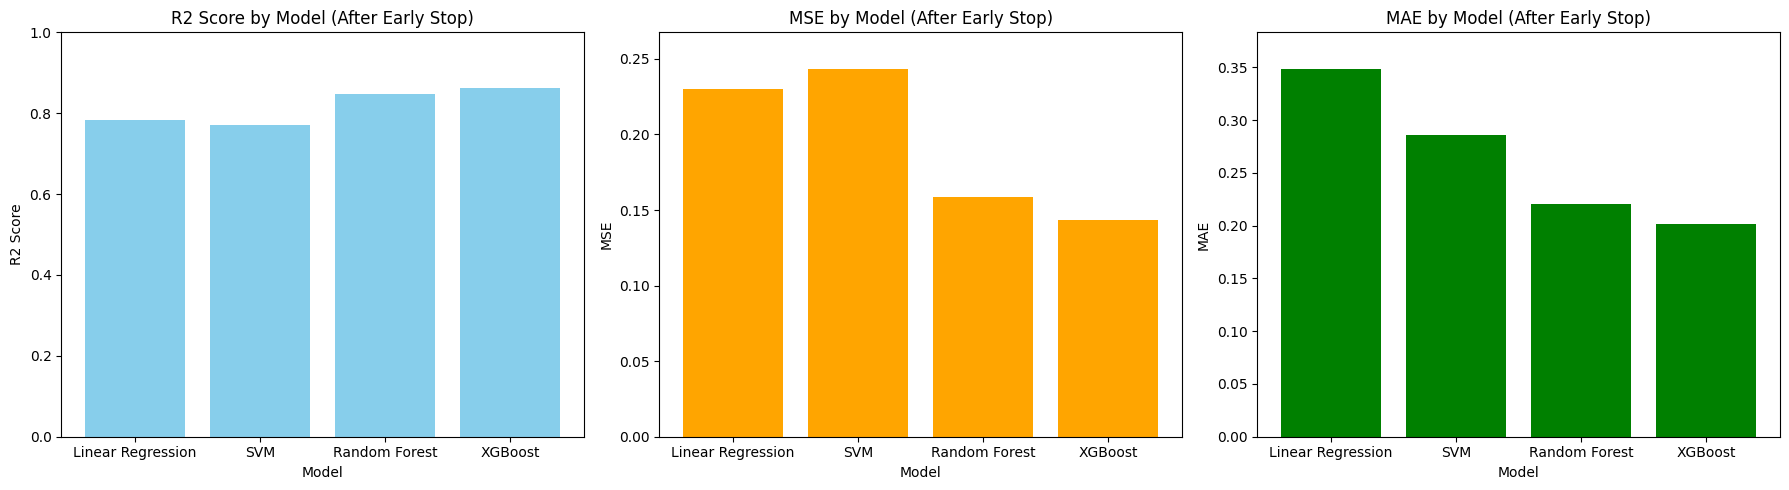

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the provided image (After Early Stop)
data_after_early_stop = {
    'Model': ['Linear Regression', 'SVM', 'Random Forest', 'XGBoost'],
    'R2 Score': [0.78205457, 0.770381716, 0.846469413, 0.861376022],
    'MSE': [0.230416628, 0.243259689, 0.158884797, 0.143452447],
    'MAE': [0.348399939, 0.286234657, 0.220461571, 0.201491277]
}

df_after_early_stop = pd.DataFrame(data_after_early_stop)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R2 Score
axes[0].bar(df_after_early_stop['Model'], df_after_early_stop['R2 Score'], color='skyblue')
axes[0].set_title('R2 Score by Model (After Early Stop)')
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('R2 Score')

# MSE
axes[1].bar(df_after_early_stop['Model'], df_after_early_stop['MSE'], color='orange')
axes[1].set_title('MSE by Model (After Early Stop)')
axes[1].set_ylim(0, max(df_after_early_stop['MSE']) * 1.1)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('MSE')

# MAE
axes[2].bar(df_after_early_stop['Model'], df_after_early_stop['MAE'], color='green')
axes[2].set_title('MAE by Model (After Early Stop)')
axes[2].set_ylim(0, max(df_after_early_stop['MAE']) * 1.1)
axes[2].set_xlabel('Model')
axes[2].set_ylabel('MAE')

plt.tight_layout()
plt.show()
